In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from mpl_toolkits.axes_grid1 import make_axes_locatable
from utilities import calculate_psnr, calculate_rmse, calculate_ssim
import matplotlib
params={
    'text.usetex':True,
    'font.family':'serif',
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)

# **Generate Metrics CSV**

In [37]:
# model = 'model6'
# psnr = {}
# ssim = {}
# rmse = {}
# model_paths = np.sort(glob(f"checkpoint/{model}/finetune/**/g_final.pth", recursive=True))
# for model_path in model_paths:
#     print(model_path)
#     key = os.path.basename(os.path.dirname(model_path))
#     gts = np.sort(glob(os.path.dirname(model_path)+"/results/gt_*.npy"))
#     fakes = np.sort(glob(os.path.dirname(model_path)+"/results/img_*.npy"))
#     masks = np.sort(glob(os.path.dirname(model_path)+"/results/mask_*.npy"))
#     ssim_temp, psnr_temp, rmse_temp = [], [], []
#     for gt, fake, mask in zip(gts, fakes, masks):
#         fake = np.load(fake)
#         gt = np.load(gt)
#         mask = np.ma.make_mask(np.load(mask)[:, :, 0])
#         ssim_temp.append(calculate_ssim(gt, fake, mask))
#         psnr_temp.append(calculate_psnr(gt, fake, mask))
#         rmse_temp.append(calculate_rmse(gt, fake, mask))
#     ssim[key] = np.median(ssim_temp)
#     psnr[key] = np.median(psnr_temp)
#     rmse[key] = np.median(rmse_temp)
# with open(f"results/{model}/{model}_metrics.csv", "w") as f:
#     header = ['iters', 'ssim', 'psnr', 'rmse']
#     writer = csv.writer(f)
#     writer.writerow(header)
#     for (k, s, p, r) in zip(ssim.keys(), ssim.values(), psnr.values(), rmse.values()):
#         row = [k]
#         row += [s] + [p] + [r]
#         writer.writerow(row)

In [38]:
# ood = '2_holes_model_4_holes_mask'
# psnr = {}
# ssim = {}
# rmse = {}
# ood_paths = np.sort(glob(f"checkpoint/OOD/{ood}/*+*"))
# for path in ood_paths:
#     print(path)
#     key = os.path.basename(path)
#     gts = np.sort(glob(path+"/results/gt_*.npy"))
#     fakes = np.sort(glob(path+"/results/img_*.npy"))
#     masks = np.sort(glob(path+"/results/mask_*.npy"))
#     ssim_temp, psnr_temp, rmse_temp = [], [], []
#     for gt, fake, mask in zip(gts, fakes, masks):
#         fake = np.load(fake)
#         gt = np.load(gt)
#         mask = np.ma.make_mask(np.load(mask)[:, :, 0])
#         ssim_temp.append(calculate_ssim(gt, fake, mask))
#         psnr_temp.append(calculate_psnr(gt, fake, mask))
#         rmse_temp.append(calculate_rmse(gt, fake, mask))
#     ssim[key] = np.median(ssim_temp)
#     psnr[key] = np.median(psnr_temp)
#     rmse[key] = np.median(rmse_temp)
# with open(f"results/{ood}/{ood}_metrics.csv", "w") as f:
#     header = ['iters', 'ssim', 'psnr', 'rmse']
#     writer = csv.writer(f)
#     writer.writerow(header)
#     for (k, s, p, r) in zip(ssim.keys(), ssim.values(), psnr.values(), rmse.values()):
#         row = [k]
#         row += [s] + [p] + [r]
#         writer.writerow(row)

# **Plot Metrics**

model1


model2
model3
model4
model5
model6
model7
model8
model9
model10


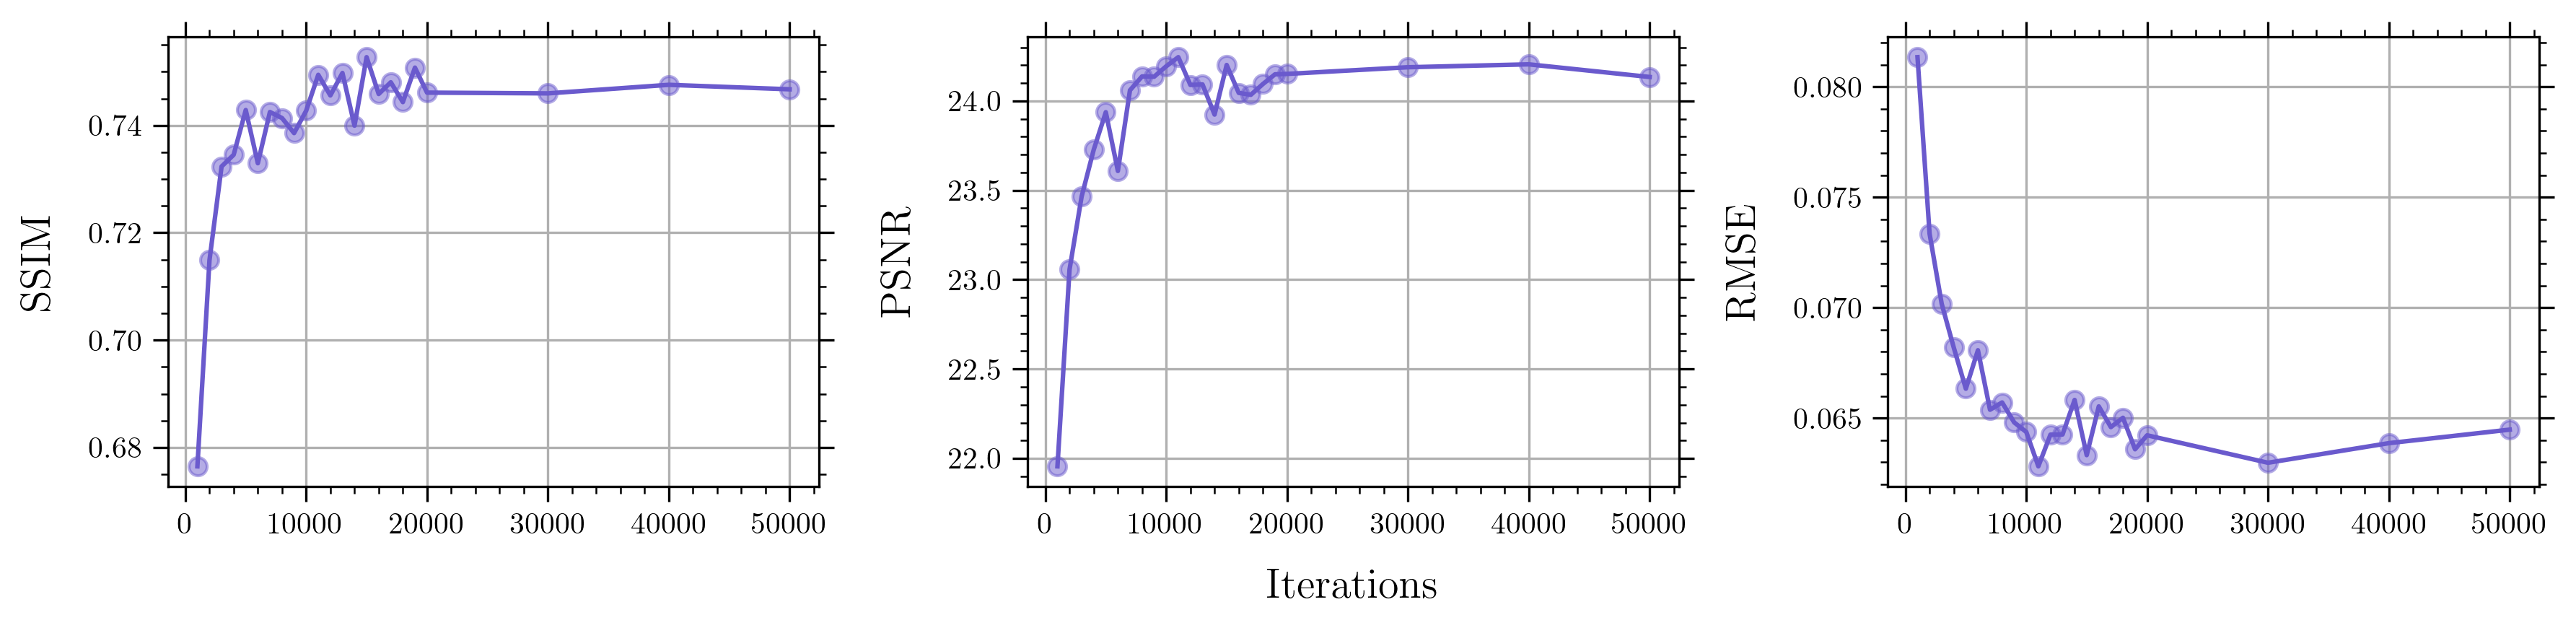

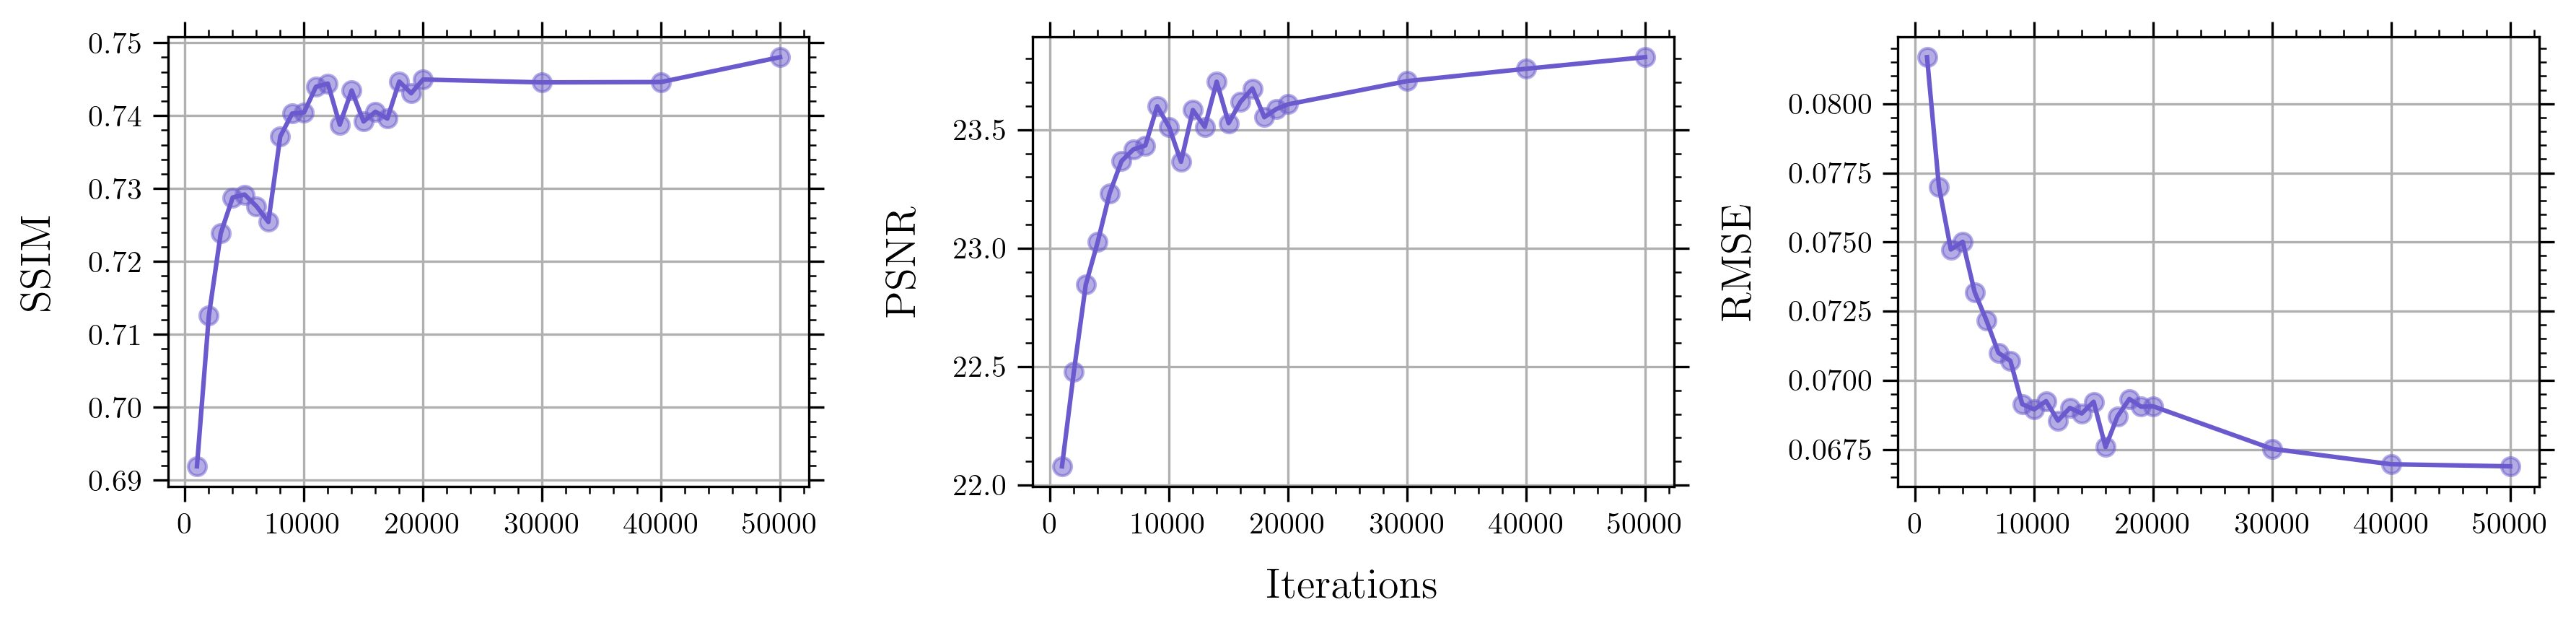

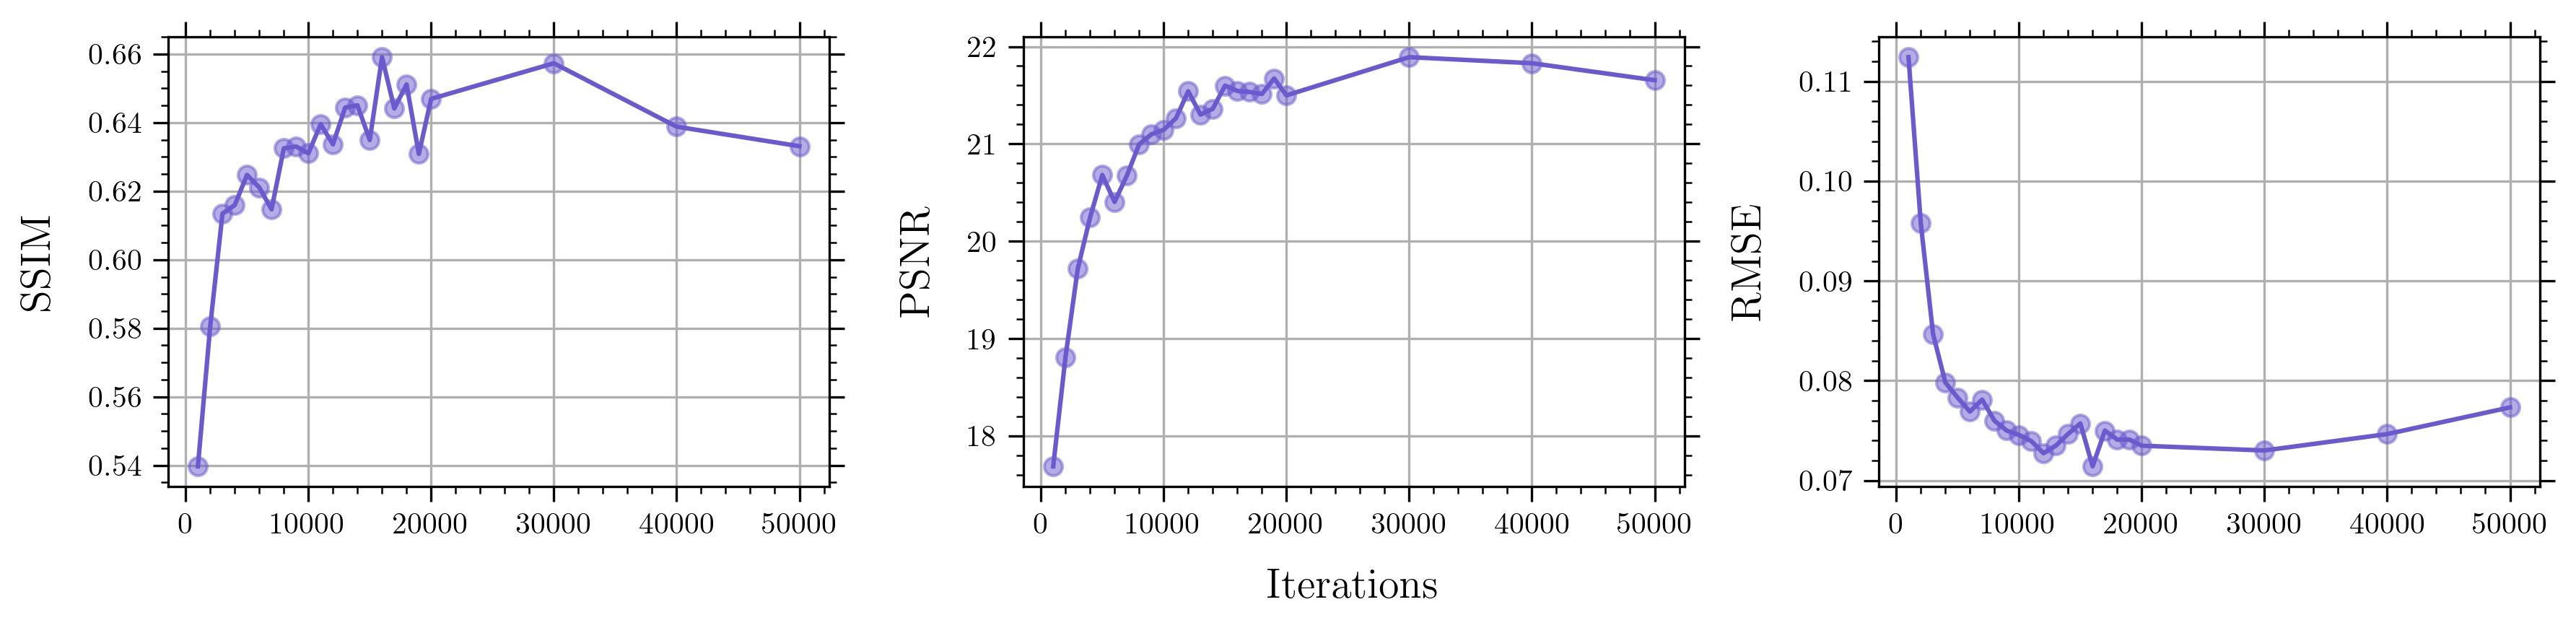

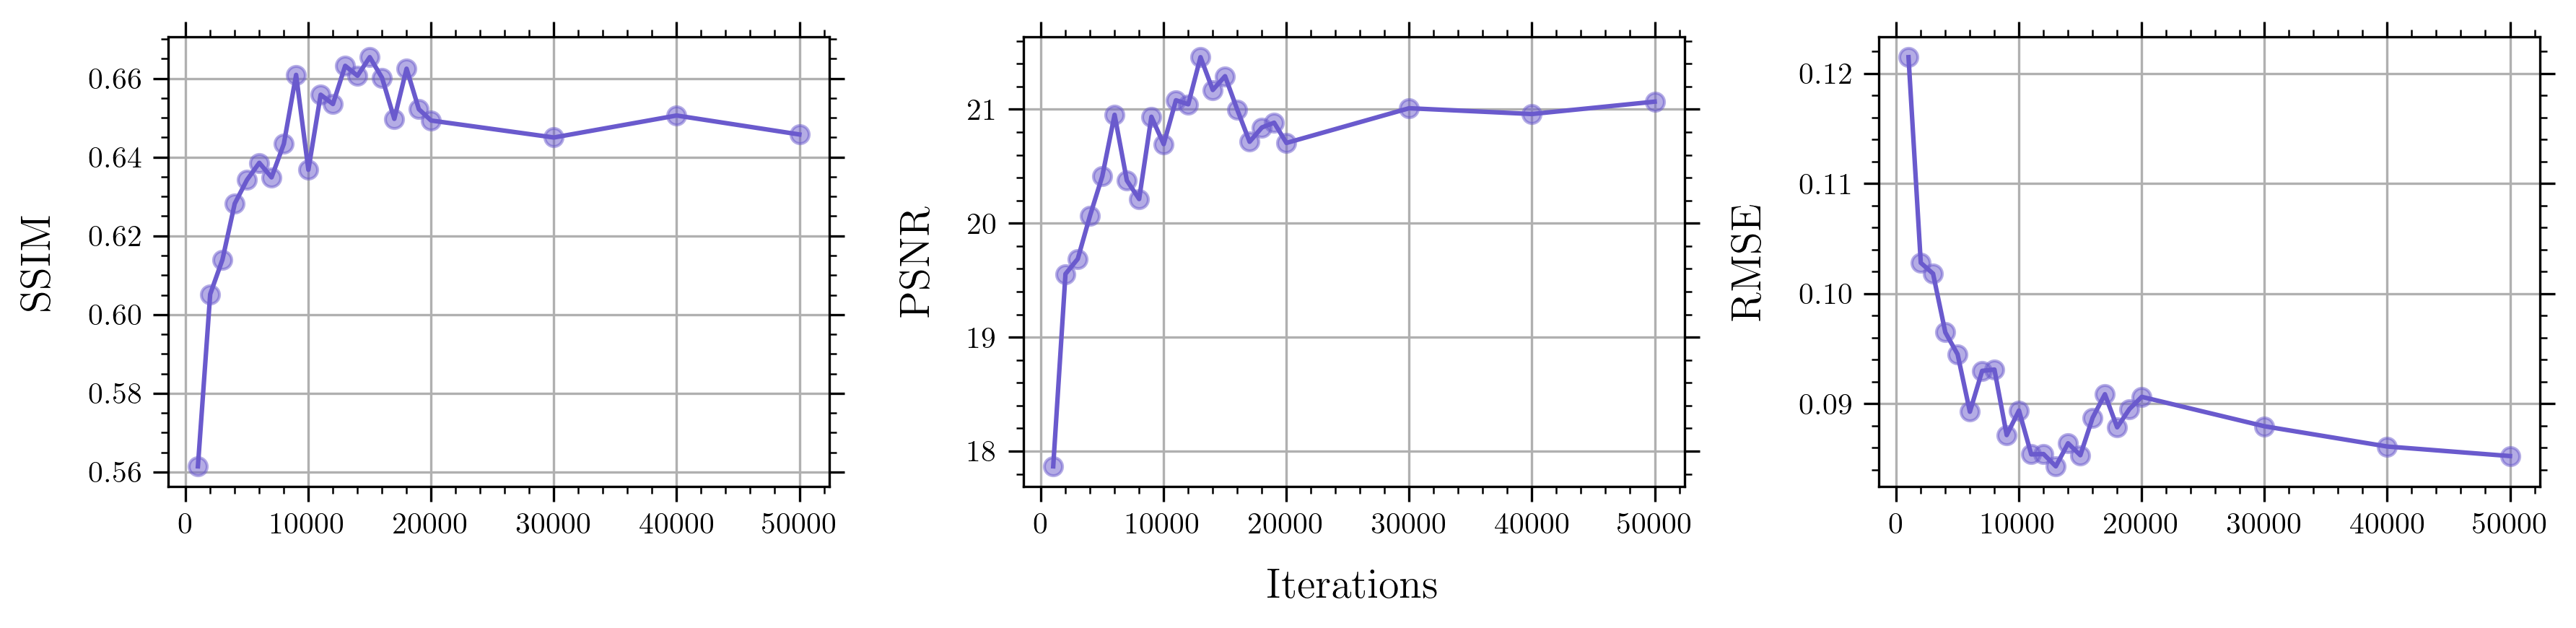

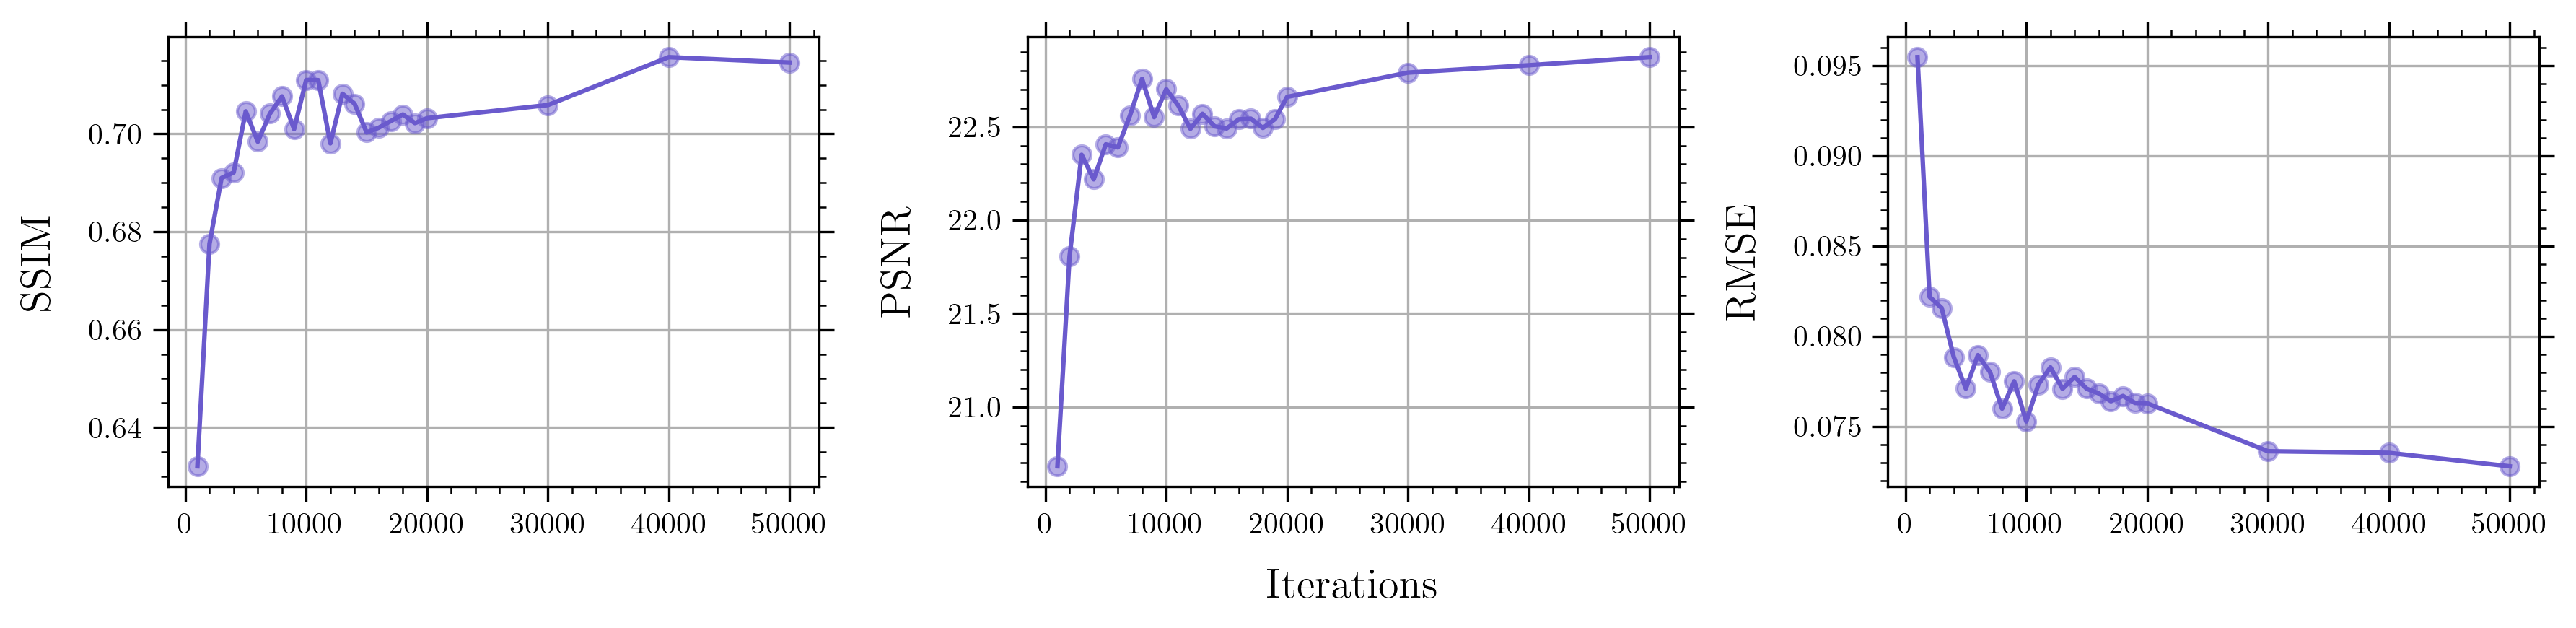

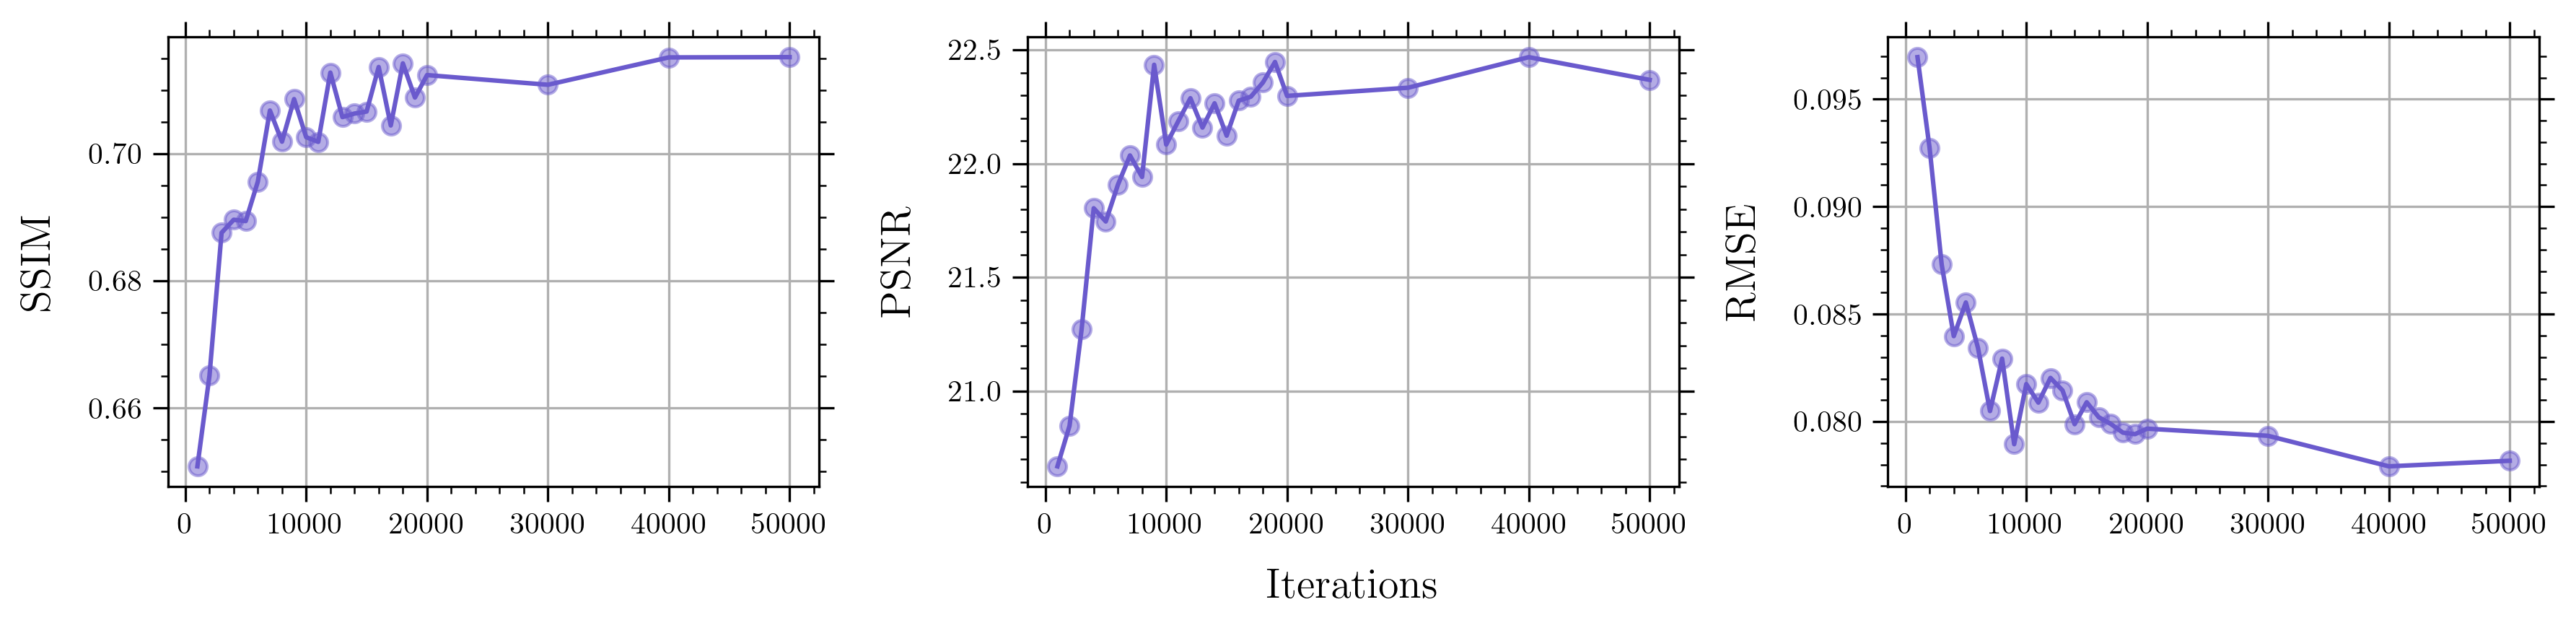

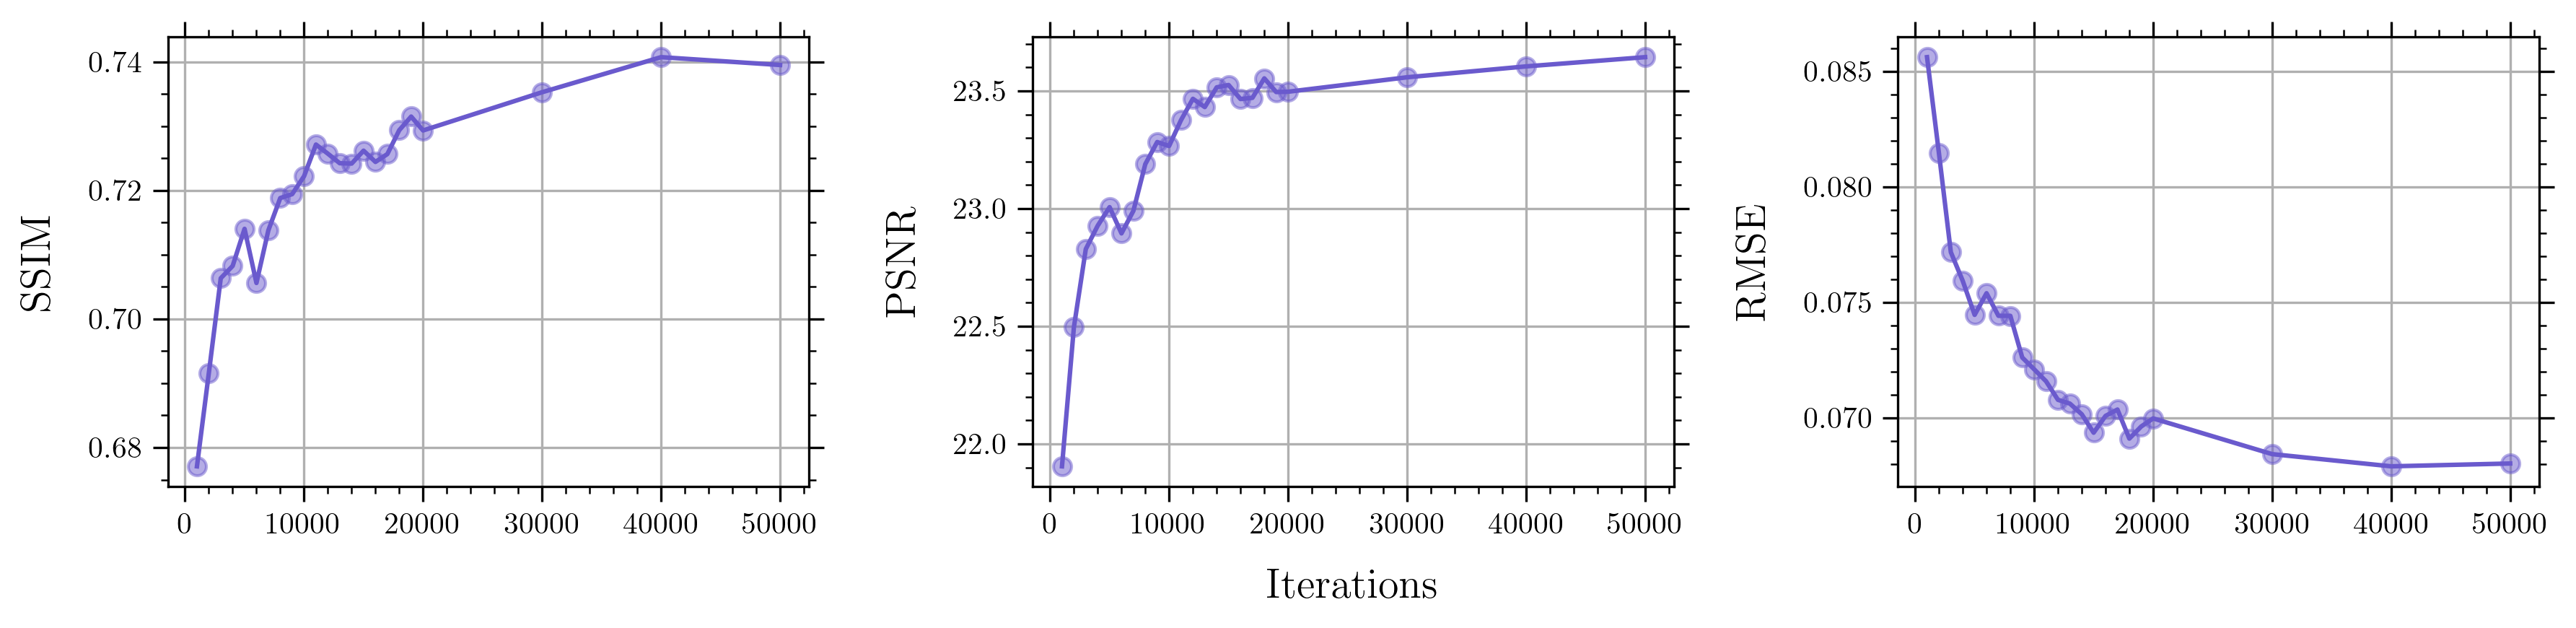

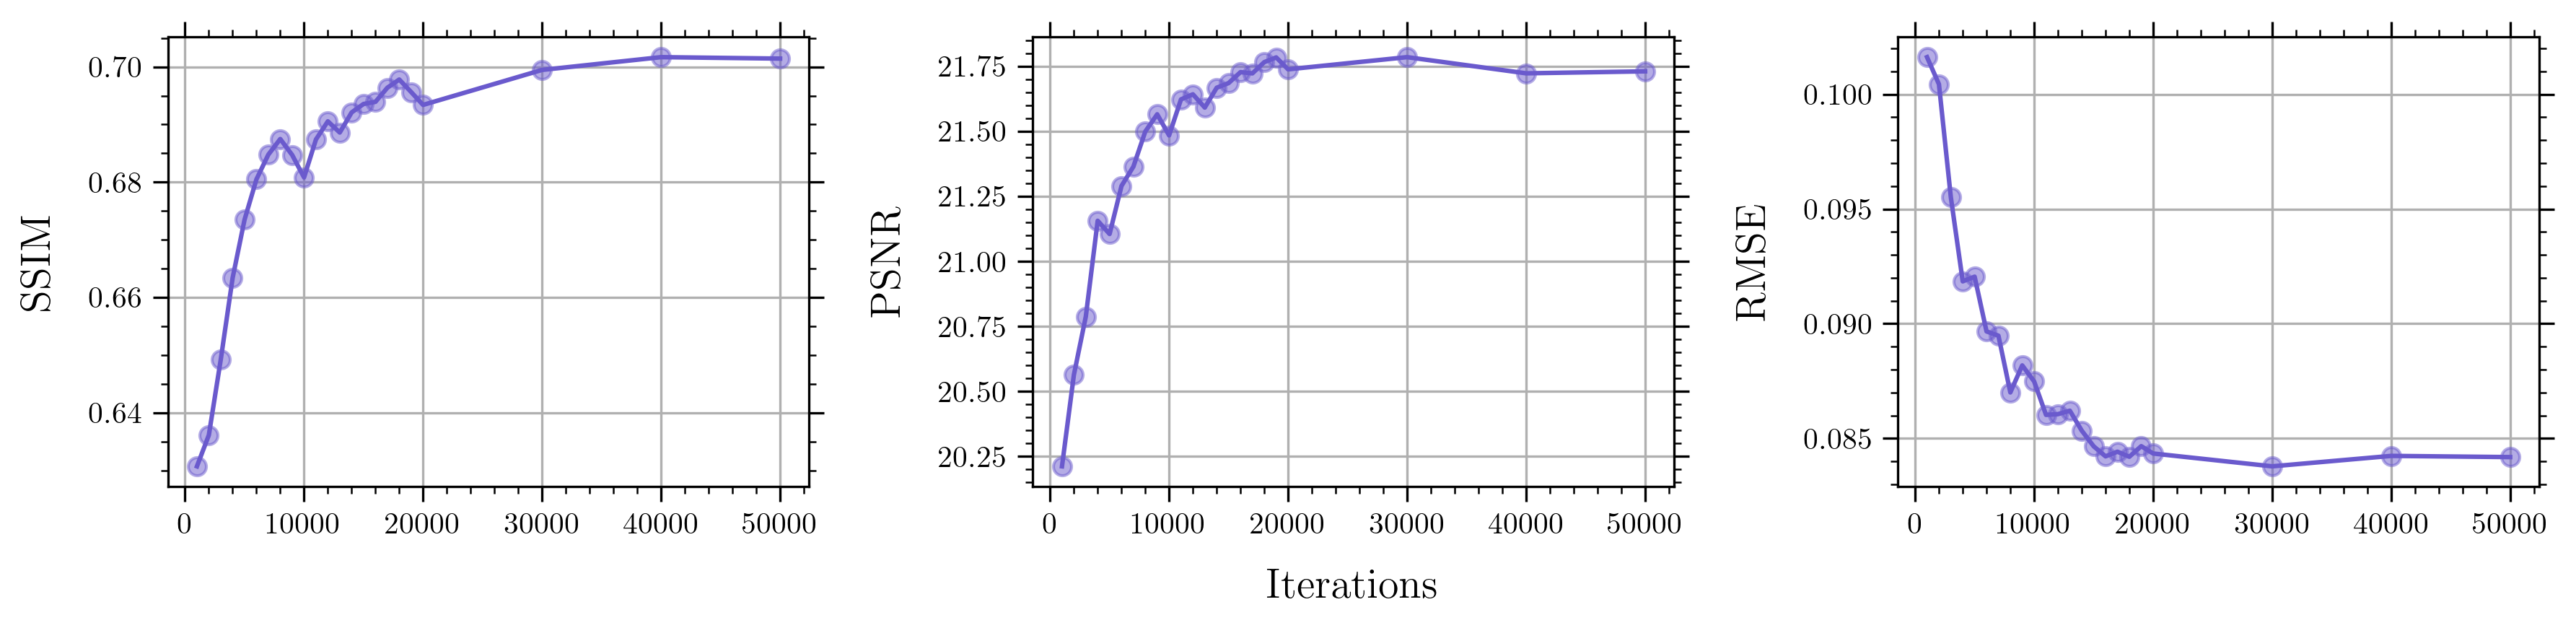

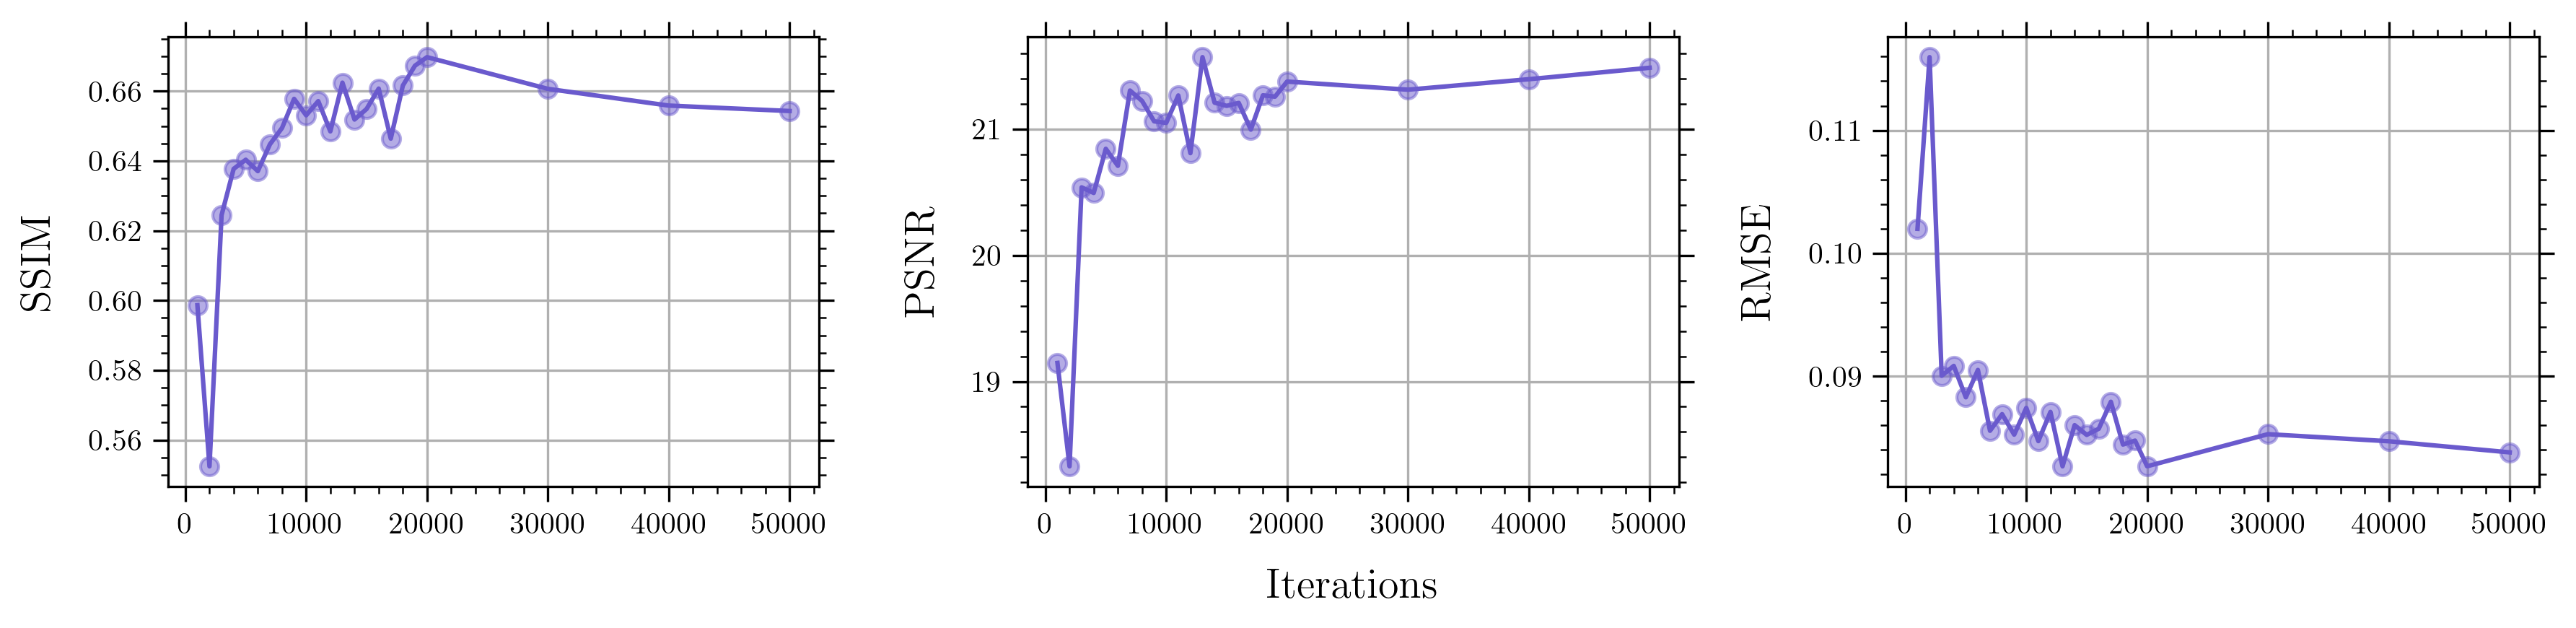

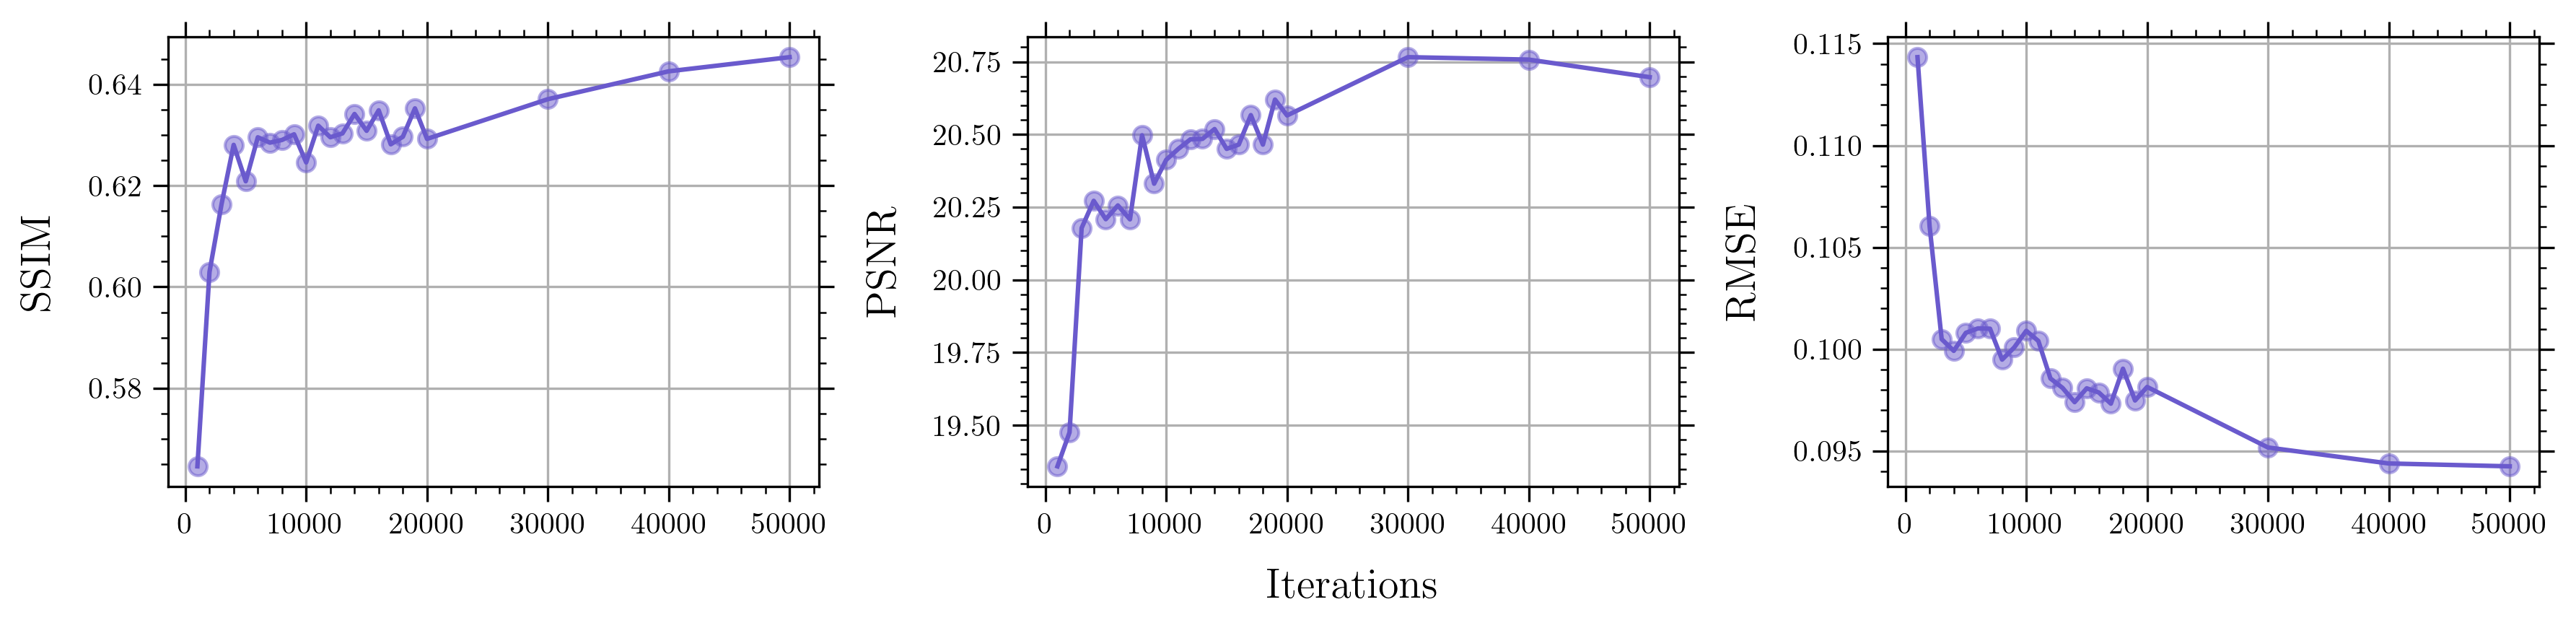

In [29]:
for model in range(1, 11):
    model = 'model'+str(model)
    print(model)
    fig, ax = plt.subplots(1, 3, figsize=(12, 3), dpi=300)
    metrics = pd.read_csv(f"results/{model}/{model}_metrics.csv")
    x = np.array([int(x.split("+")[0]) for x in metrics['iters']])
    sort = np.argsort(x)
    x = x[sort]

    for i, name in enumerate(['SSIM', 'PSNR', 'RMSE']):
        y = np.array([float(y) for y in metrics[name.lower()]])[sort]
        ax[i].plot(x, y, color='slateblue')
        ax[i].scatter(x, y, color='slateblue', alpha=0.5)
        ax[i].set_ylabel(f"{name}", labelpad=10, fontsize=14)
        if i==1:
            ax[i].set_xlabel(f"Iterations", labelpad=10, fontsize=14)
        ax[i].grid()
        i += 1
    fig.tight_layout()
    fig.savefig(f"results/{model}/{model}_metrics.png")

1_strip_model_2_strip_mask


2_holes_model_4_holes_mask


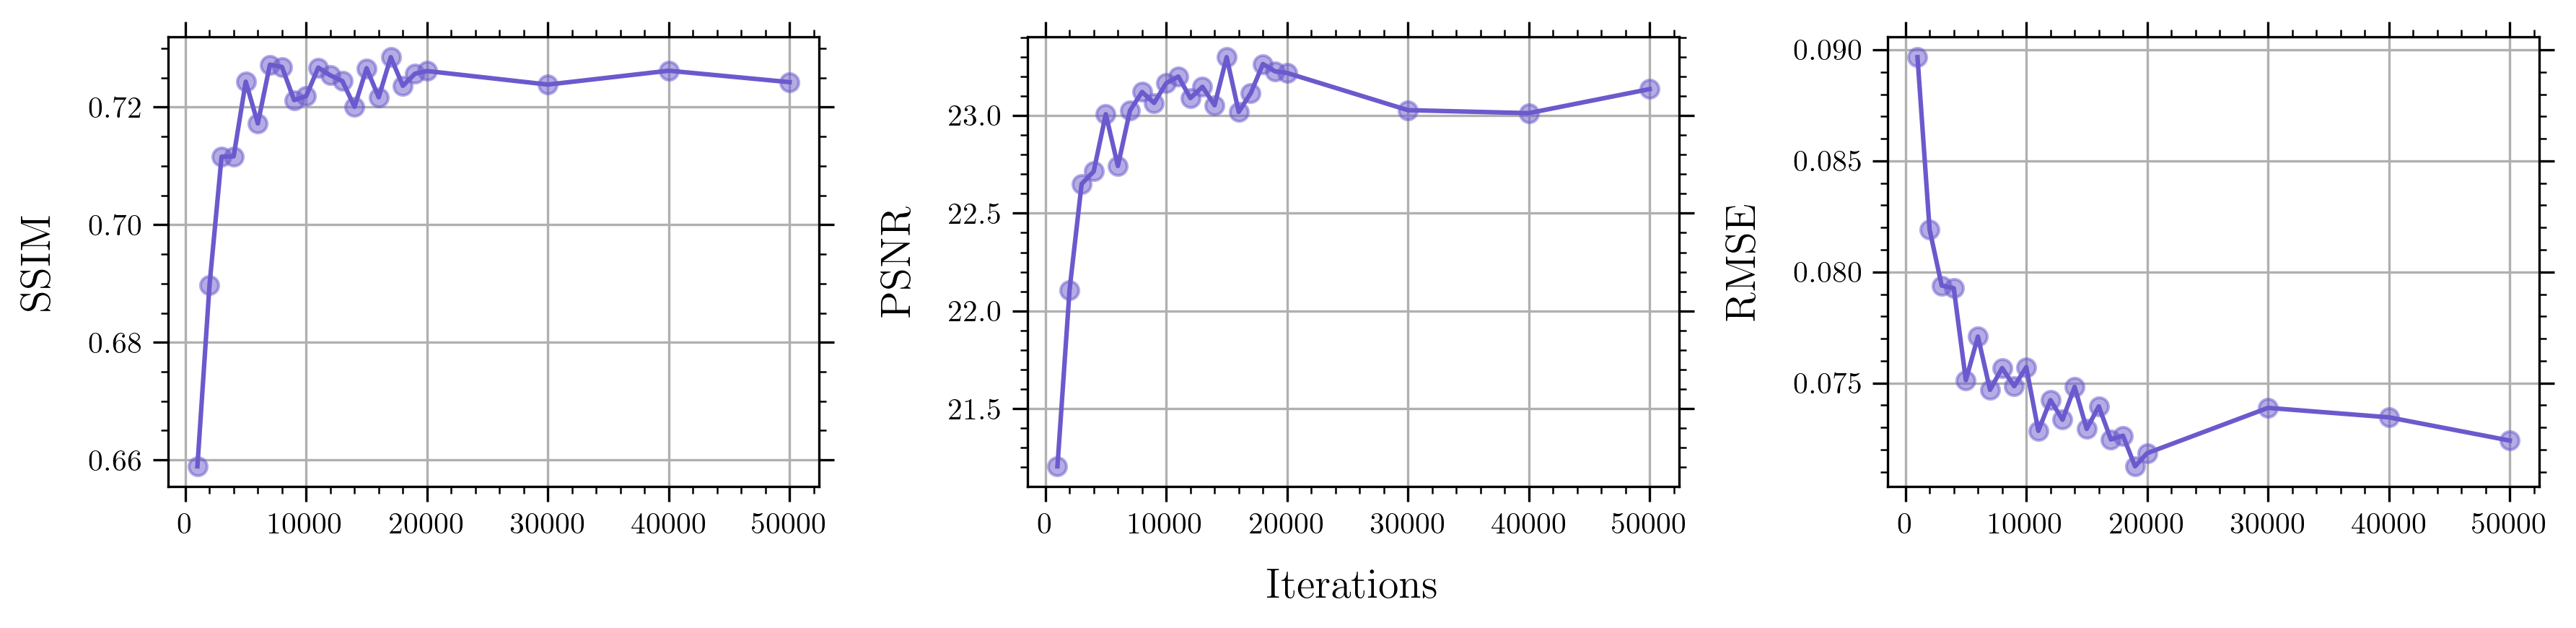

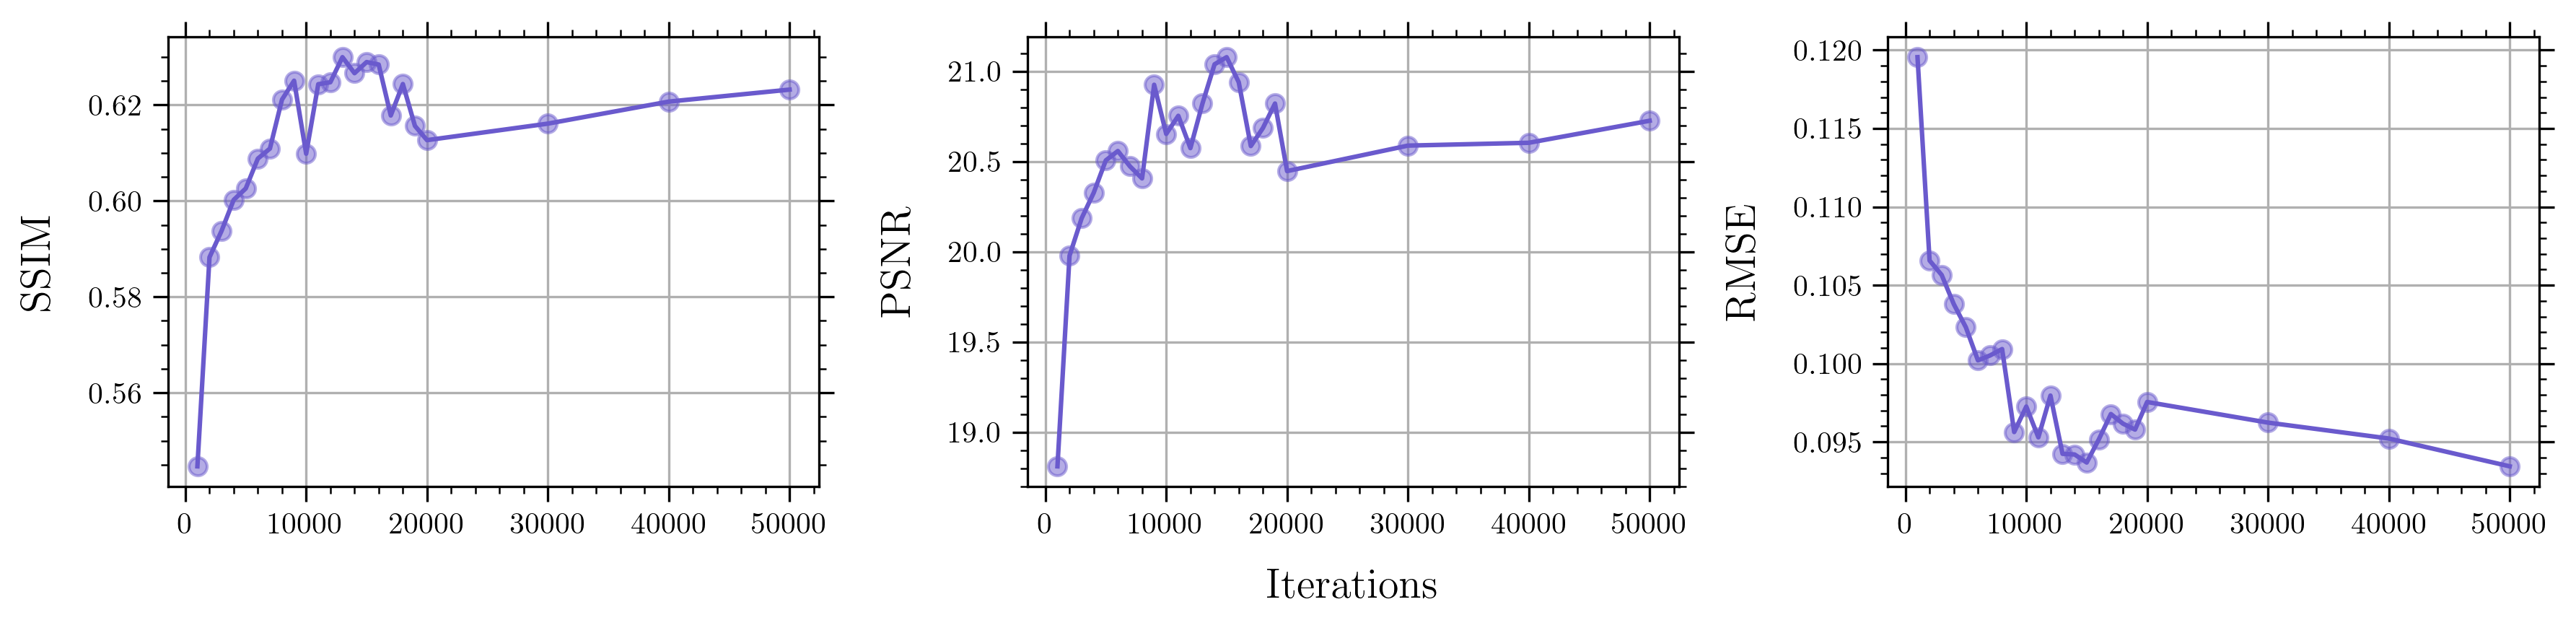

In [40]:
for model in ['1_strip_model_2_strip_mask', '2_holes_model_4_holes_mask']:
    print(model)
    fig, ax = plt.subplots(1, 3, figsize=(12, 3), dpi=300)
    metrics = pd.read_csv(f"results/{model}/{model}_metrics.csv")
    x = np.array([int(x.split("+")[0]) for x in metrics['iters']])
    sort = np.argsort(x)
    x = x[sort]

    for i, name in enumerate(['SSIM', 'PSNR', 'RMSE']):
        y = np.array([float(y) for y in metrics[name.lower()]])[sort]
        ax[i].plot(x, y, color='slateblue')
        ax[i].scatter(x, y, color='slateblue', alpha=0.5)
        ax[i].set_ylabel(f"{name}", labelpad=10, fontsize=14)
        if i==1:
            ax[i].set_xlabel(f"Iterations", labelpad=10, fontsize=14)
        ax[i].grid()
        i += 1
    fig.tight_layout()
    fig.savefig(f"results/{model}/{model}_metrics.png")

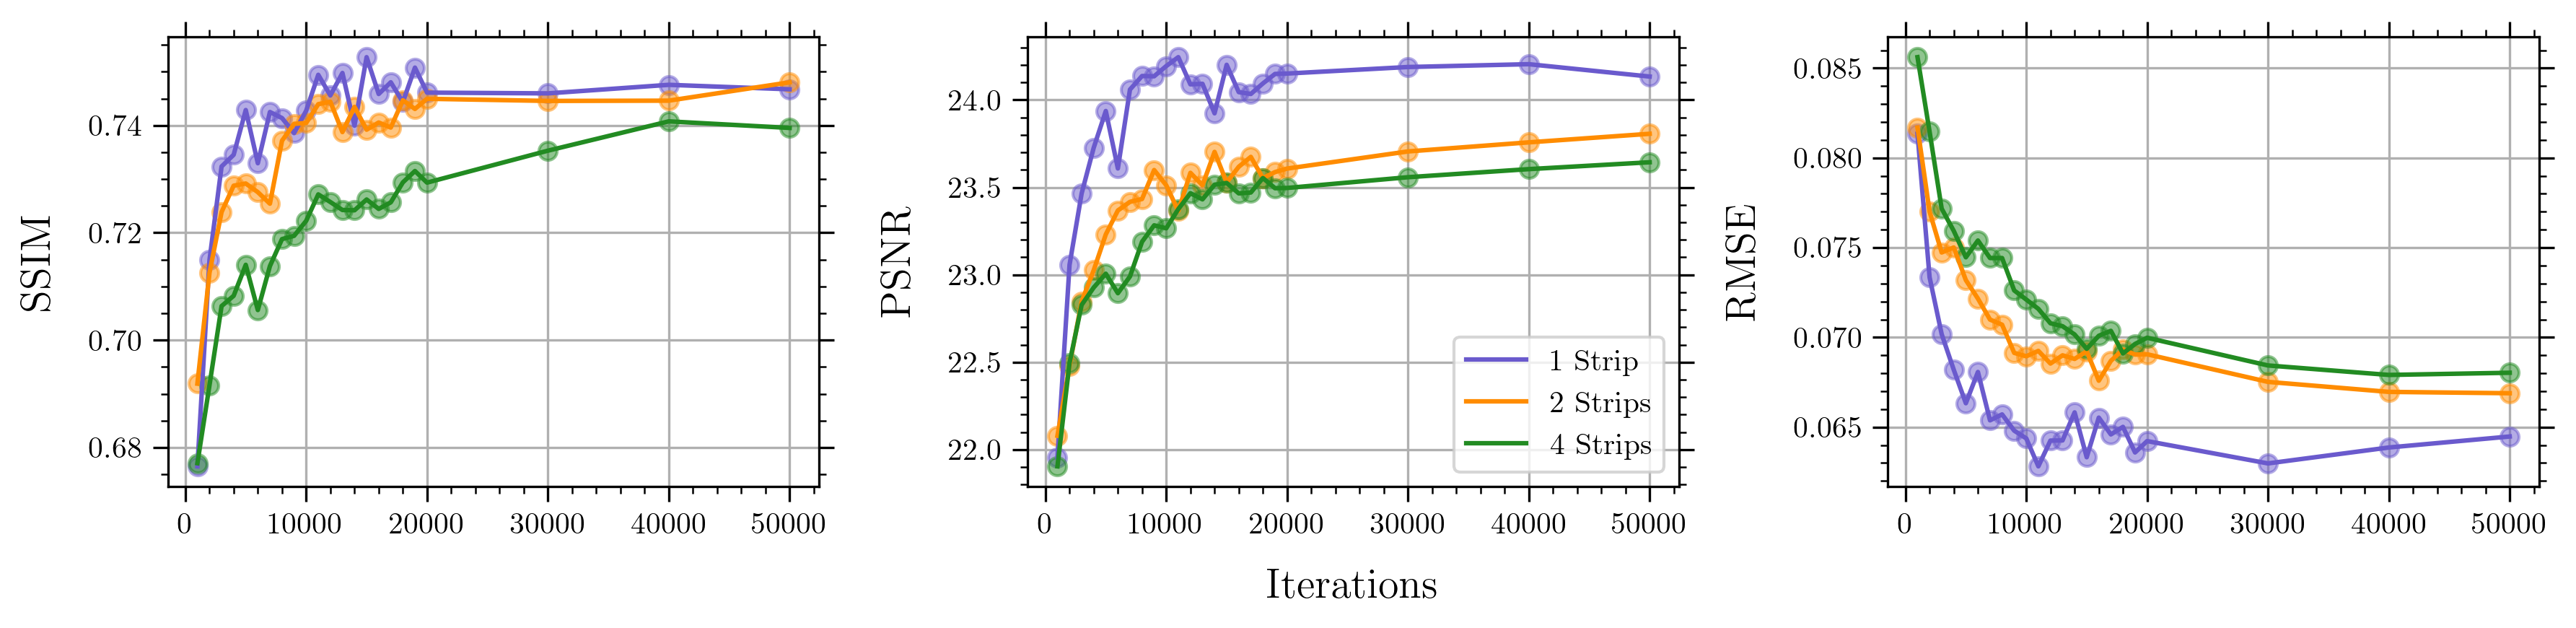

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), dpi=300)
model1 = pd.read_csv("results/model1/model1_metrics.csv")
model7 = pd.read_csv("results/model7/model7_metrics.csv")
model2 = pd.read_csv("results/model2/model2_metrics.csv")
x = np.array([int(x.split("+")[0]) for x in metrics['iters']])
sort = np.argsort(x)
x = x[sort]
for i, name in enumerate(['SSIM', 'PSNR', 'RMSE']):
    for model, label, color in zip([model1, model2, model7], ['1 Strip', '2 Strips', '4 Strips'], ['slateblue', 'darkorange', 'forestgreen']):
        y = np.array([float(y) for y in model[name.lower()]])[sort]
        ax[i].plot(x, y, color=color, label=label)
        ax[i].scatter(x, y, color=color, alpha=0.5)
    ax[i].set_ylabel(f"{name}", labelpad=10, fontsize=14)
    if i==1:
        ax[i].set_xlabel(f"Iterations", labelpad=10, fontsize=14)
        ax[i].legend(loc='lower right')
    ax[i].grid()
    i += 1
fig.tight_layout()
fig.savefig(f"results/1_vs_2_vs_4_strips.png")

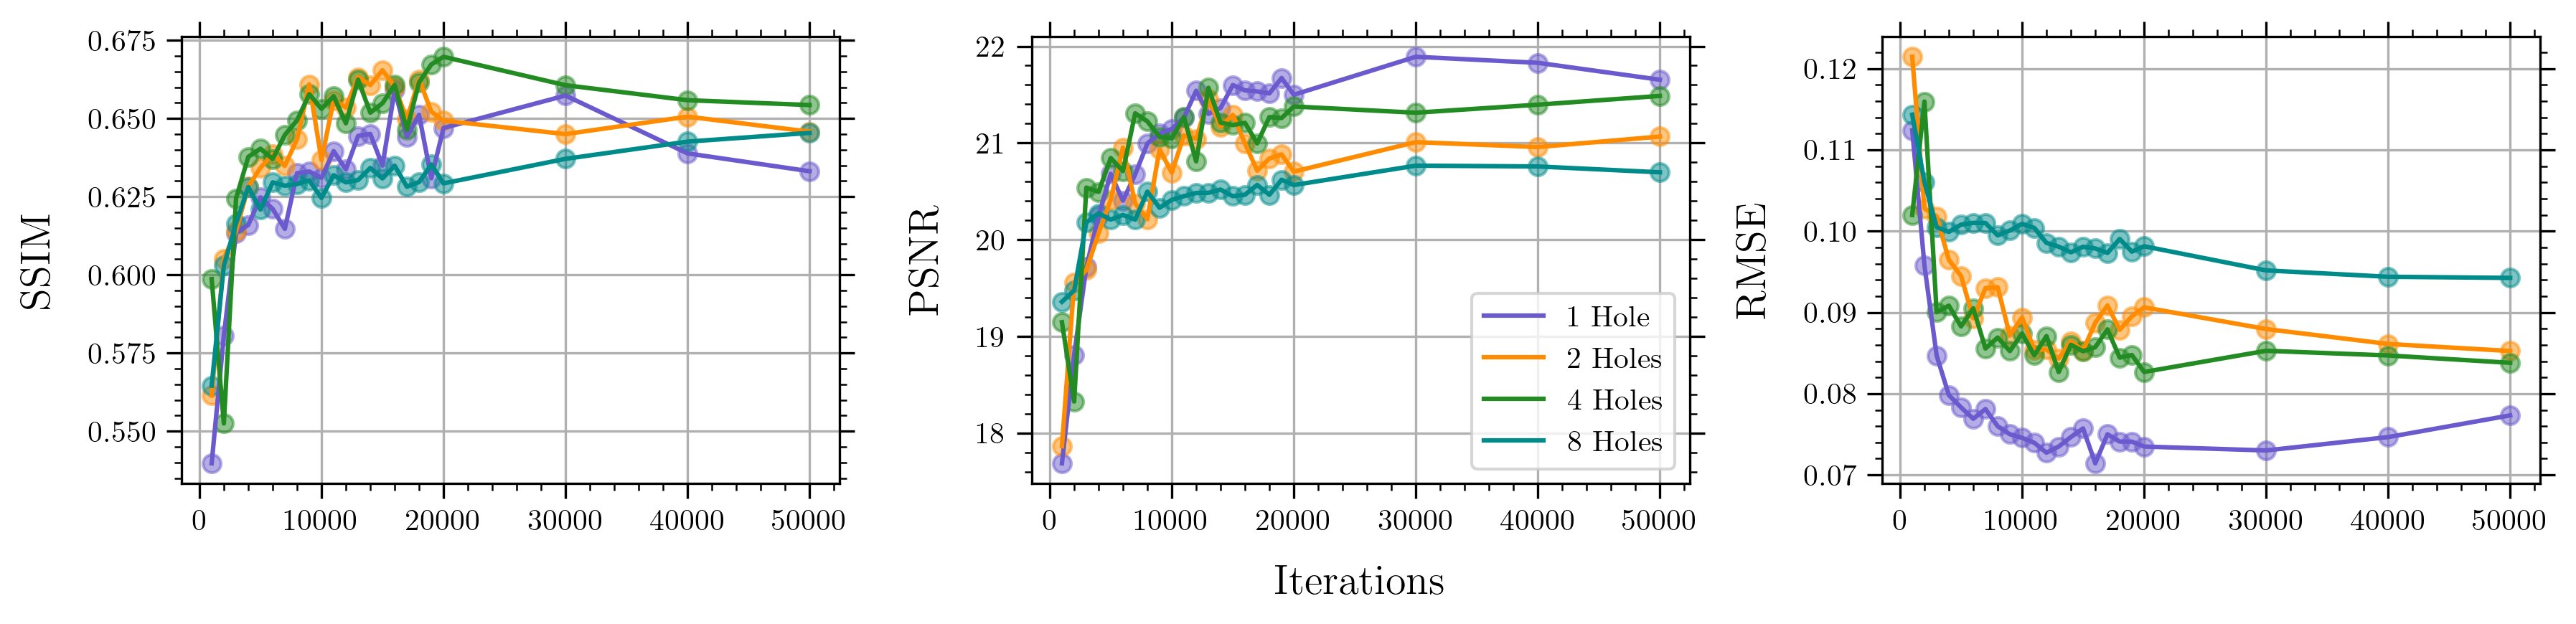

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), dpi=300)
model3 = pd.read_csv("results/model3/model3_metrics.csv")
model4 = pd.read_csv("results/model4/model4_metrics.csv")
model9 = pd.read_csv("results/model9/model9_metrics.csv")
model10 = pd.read_csv("results/model10/model10_metrics.csv")
x = np.array([int(x.split("+")[0]) for x in metrics['iters']])
sort = np.argsort(x)
x = x[sort]

for i, name in enumerate(['SSIM', 'PSNR', 'RMSE']):
    for model, label, color in zip([model3, model4, model9, model10], ['1 Hole', '2 Holes', '4 Holes', '8 Holes'], ['slateblue', 'darkorange', 'forestgreen', 'darkcyan']):
        y = np.array([float(y) for y in model[name.lower()]])[sort]
        ax[i].plot(x, y, color=color, label=label)
        ax[i].scatter(x, y, color=color, alpha=0.5)
    ax[i].set_ylabel(f"{name}", labelpad=10, fontsize=14)
    if i==1:
        ax[i].set_xlabel(f"Iterations", labelpad=10, fontsize=14)
        ax[i].legend(loc='lower right')
    ax[i].grid()
    i += 1
fig.tight_layout()
fig.savefig(f"results/1_vs_2_vs_4_vs_8_holes.png")

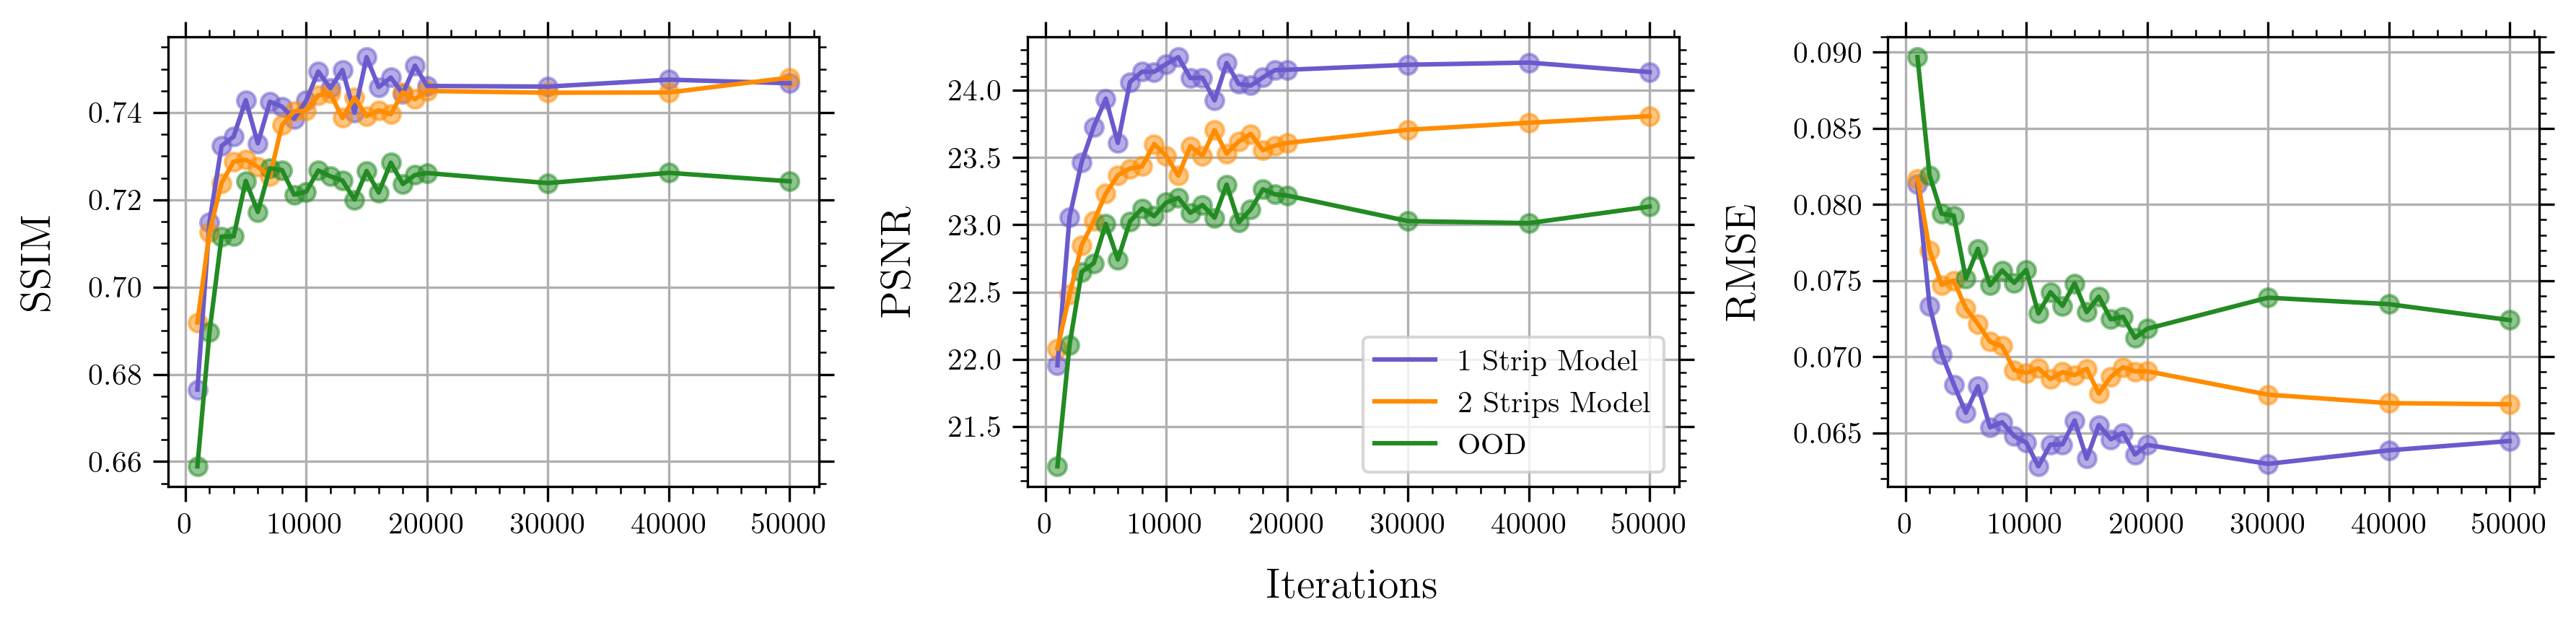

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), dpi=300)
model1 = pd.read_csv("results/model1/model1_metrics.csv")
model2 = pd.read_csv("results/model2/model2_metrics.csv")
ood = pd.read_csv("results/1_strip_model_2_strip_mask_metrics.csv")
x = np.array([int(x.split("+")[0]) for x in metrics['iters']])
sort = np.argsort(x)
x = x[sort]
for i, name in enumerate(['SSIM', 'PSNR', 'RMSE']):
    for model, label, color in zip([model1, model2, ood], ['1 Strip Model', '2 Strips Model', 'OOD'], ['slateblue', 'darkorange', 'forestgreen']):
        y = np.array([float(y) for y in model[name.lower()]])[sort]
        ax[i].plot(x, y, color=color, label=label)
        ax[i].scatter(x, y, color=color, alpha=0.5)
    ax[i].set_ylabel(f"{name}", labelpad=10, fontsize=14)
    if i==1:
        ax[i].set_xlabel(f"Iterations", labelpad=10, fontsize=14)
        ax[i].legend(loc='lower right')
    ax[i].grid()
    i += 1
fig.tight_layout()
fig.savefig(f"results/1_strip_model_2_strip_mask_comparision.png")

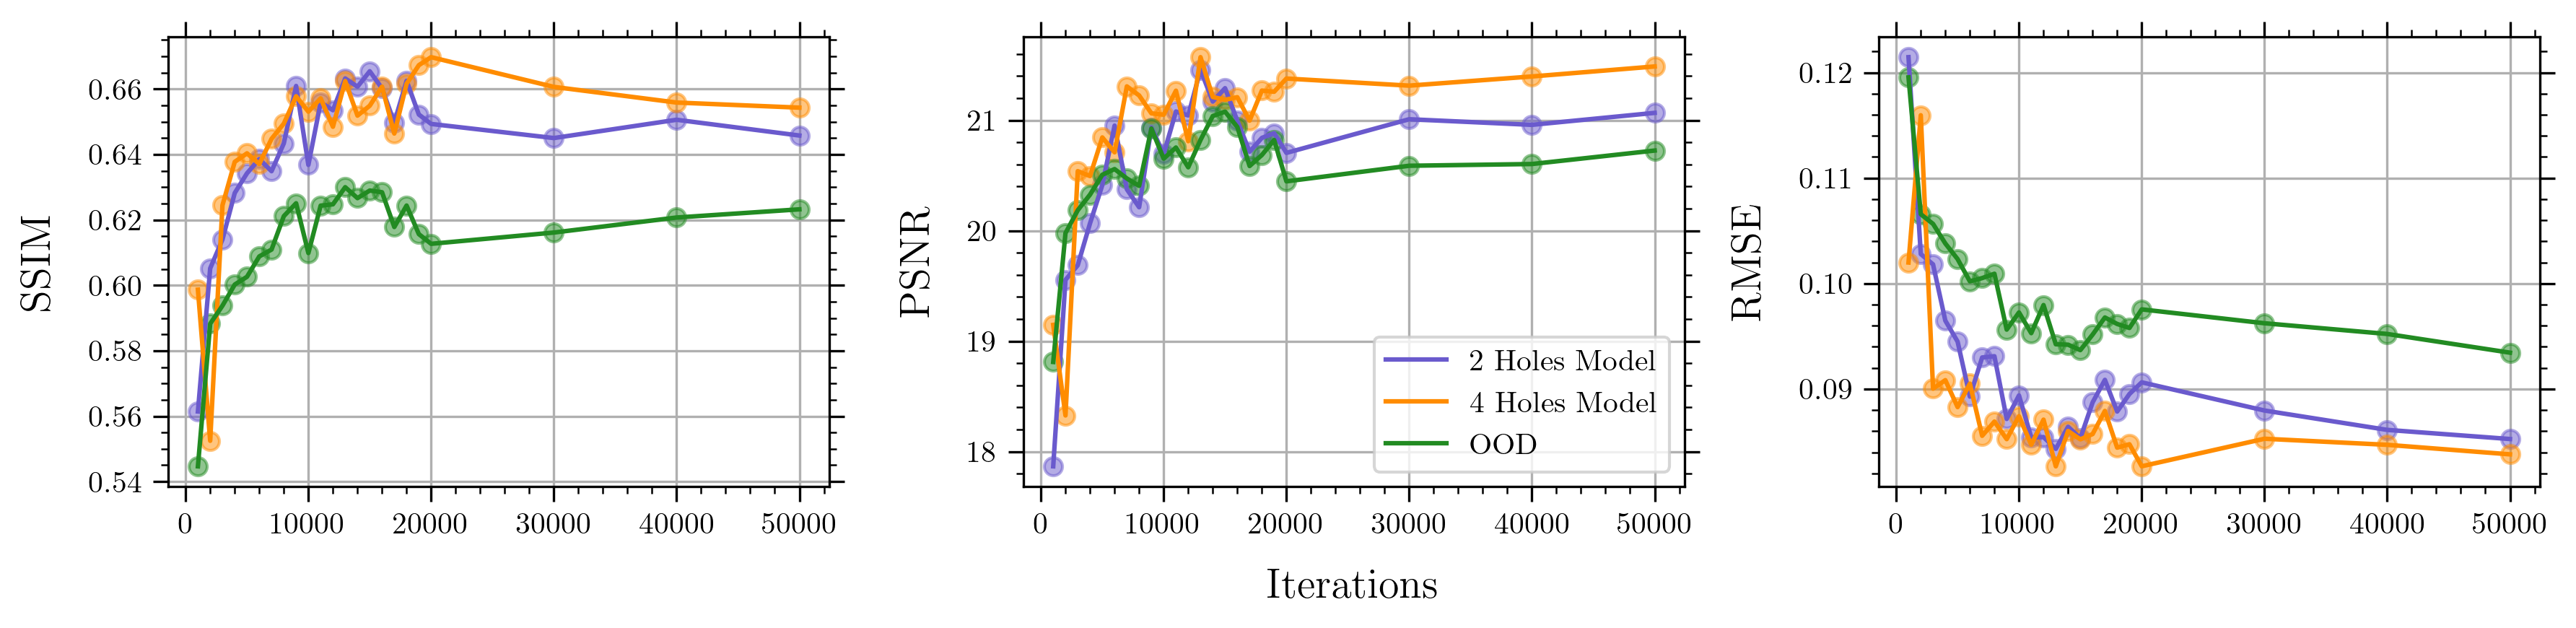

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), dpi=300)
model4 = pd.read_csv("results/model4/model4_metrics.csv")
model9 = pd.read_csv("results/model9/model9_metrics.csv")
ood = pd.read_csv("results/2_holes_model_4_holes_mask_metrics.csv")
x = np.array([int(x.split("+")[0]) for x in metrics['iters']])
sort = np.argsort(x)
x = x[sort]
for i, name in enumerate(['SSIM', 'PSNR', 'RMSE']):
    for model, label, color in zip([model4, model9, ood], ['2 Holes Model', '4 Holes Model', 'OOD'], ['slateblue', 'darkorange', 'forestgreen']):
        y = np.array([float(y) for y in model[name.lower()]])[sort]
        ax[i].plot(x, y, color=color, label=label)
        ax[i].scatter(x, y, color=color, alpha=0.5)
    ax[i].set_ylabel(f"{name}", labelpad=10, fontsize=14)
    if i==1:
        ax[i].set_xlabel(f"Iterations", labelpad=10, fontsize=14)
        ax[i].legend(loc='lower right')
    ax[i].grid()
    i += 1
fig.tight_layout()
fig.savefig(f"results/2_holes_model_4_holes_mask_comparision.png")

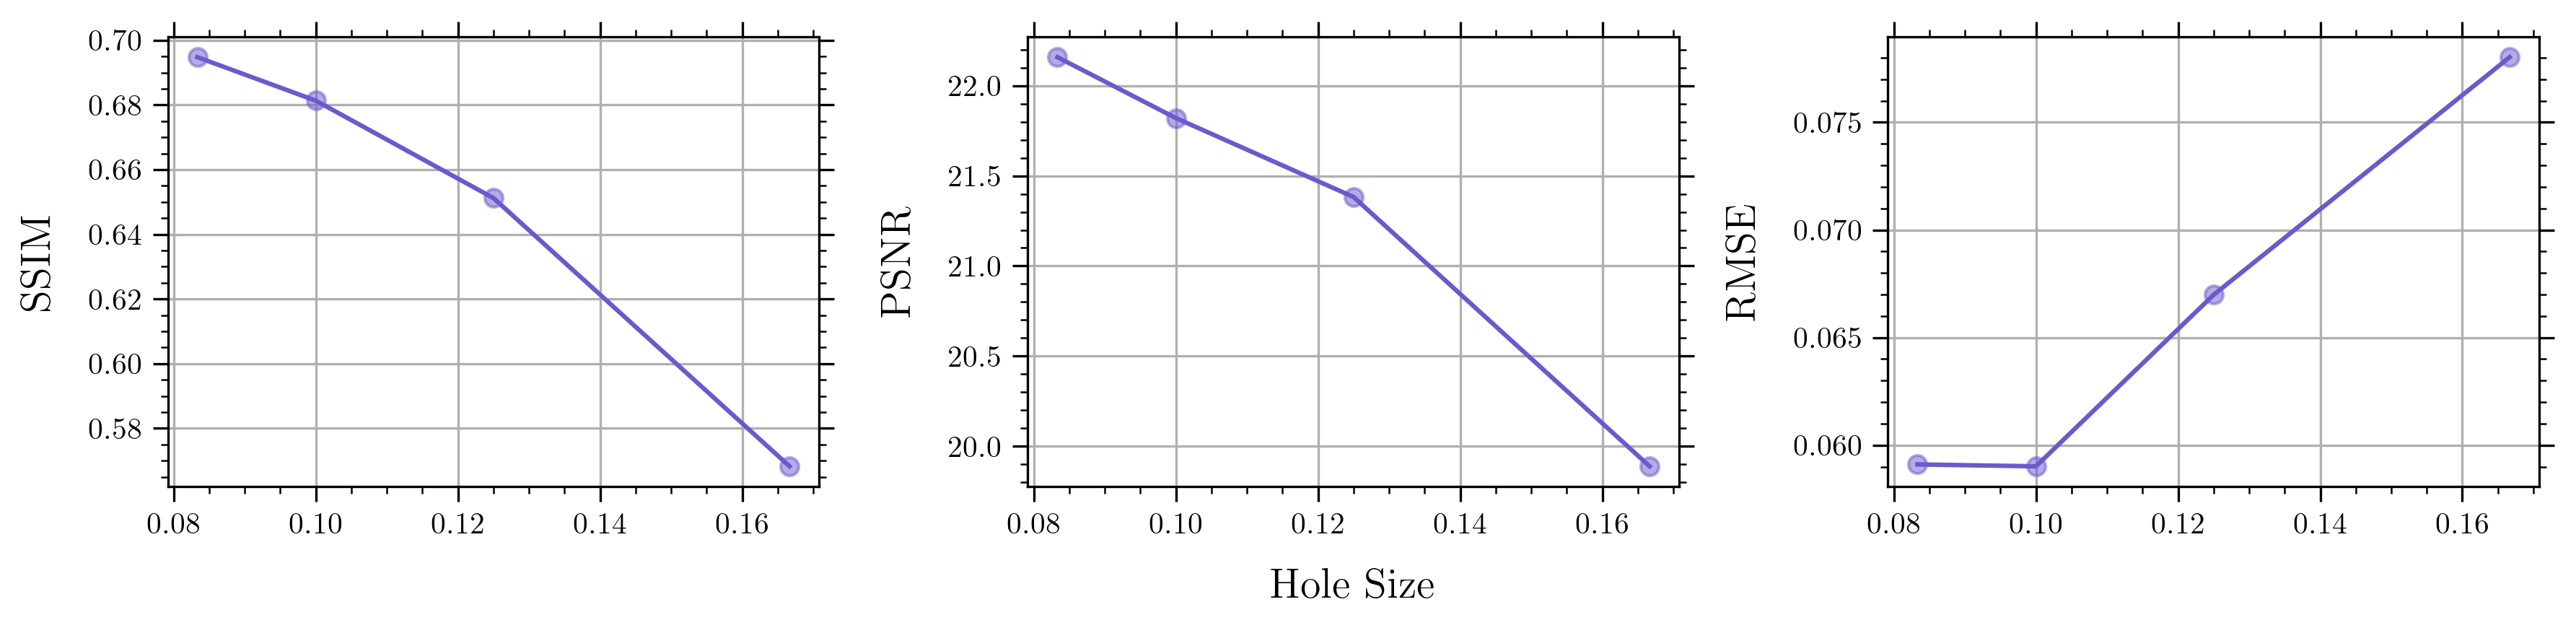

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), dpi=300)
metrics = pd.read_csv(f"results/hole_ratio_vs_metrics.csv")
x = 1/metrics['ratio']
for i, name in enumerate(['SSIM', 'PSNR', 'RMSE']):
    y = np.array([float(y) for y in metrics[name.lower()]])
    ax[i].plot(x, y, color='slateblue')
    ax[i].scatter(x, y, color='slateblue', alpha=0.5)
    ax[i].set_ylabel(f"{name}", labelpad=10, fontsize=14)
    if i==1:
        ax[i].set_xlabel(f"Hole Size", labelpad=10, fontsize=14)
    ax[i].grid()
    i += 1
fig.tight_layout()
fig.savefig("results/hole_ratio_vs_metrics.png")